In [38]:

import torch
import numpy as np

import copy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

import copy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# N, D_in, H, D_out = 64, 1000, 100, 10
N, D_in, D_out = 100000, 2, 1

# 입력과 출력 위한 랜덤 텐서
X = []
y = []
for j in range(N):
    X.append([])
    #y.append([])
    for i in range(D_out):
        X[-1].append( np.random.uniform(low=0.0, high=1000.0, size=None) )
        X[-1].append( np.random.uniform(low=-1000.0, high=1000.0, size=None) )
        y.append( (X[-1][-1]**2) / (2*X[-1][-2])  )


X = torch.Tensor(X)
y = torch.Tensor(y)

# nn package를 이용하여 여러 층으로 정의된 모델 생성
# nn.Sequential은 다른 모듈을 담을 수 있는 모듈이며 담겨진 모듈은 순서대로 연결
# Linear 모듈은 곧 Affine 모듈

# Read data
# data = fetch_california_housing()
# X, y = data.data, data.target

# train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)




In [ ]:
#default
# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
# Define the model
model = nn.Sequential(
    nn.Linear(2, 6),
    nn.ReLU(),
    nn.Linear(6, 3),
    nn.ReLU(),
    nn.Linear(3, 2),
    nn.ReLU(),
    nn.Linear(2, 1)
    # nn.Linear(8, 24),
    # nn.ReLU(),
    # nn.Linear(24, 12),
    # nn.ReLU(),
    # nn.Linear(12, 6),
    # nn.ReLU(),
    # nn.Linear(6, 1)
)

# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

n_epochs = 100   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
    print(epoch, 'loss:', mse)

# restore model and return best accuracy
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

<ipython-input-24-dcb9fb042ac0>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-24-dcb9fb042ac0>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
<ipython-input-24-dcb9fb042ac0>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-24-dcb9fb042ac0>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().de

0 loss: 747051456.0
1 loss: 747051392.0
2 loss: 747051328.0
3 loss: 747051264.0
4 loss: 747051136.0
5 loss: 747051072.0
6 loss: 747051008.0
7 loss: 747050816.0
8 loss: 747050688.0
9 loss: 747050624.0
10 loss: 747050560.0
11 loss: 747050560.0
12 loss: 747050432.0
13 loss: 747050368.0
14 loss: 747050240.0
15 loss: 747050112.0
16 loss: 747049984.0


KeyboardInterrupt: ignored

In [ ]:
y_pred

tensor([[1.2833],
        [1.2833],
        [1.2833],
        [1.2833],
        [1.2833],
        [1.2833],
        [1.2833],
        [1.2833],
        [1.2833],
        [1.2833]], grad_fn=<AddmmBackward0>)

In [ ]:
y_batch

tensor([[2.8807e+03],
        [3.2145e+02],
        [4.3440e+02],
        [1.5193e+02],
        [1.6288e+03],
        [2.8579e+00],
        [3.2997e-03],
        [1.5066e+02],
        [9.3250e+02],
        [1.4629e-01]])

In [ ]:
y_pred - y_batch

tensor([[-2.8795e+03],
        [-3.2017e+02],
        [-4.3312e+02],
        [-1.5064e+02],
        [-1.6276e+03],
        [-1.5746e+00],
        [ 1.2800e+00],
        [-1.4938e+02],
        [-9.3122e+02],
        [ 1.1370e+00]], grad_fn=<SubBackward0>)

In [ ]:
(y_pred - y_batch)/y_batch

tensor([[ -0.9996],
        [ -0.9960],
        [ -0.9970],
        [ -0.9916],
        [ -0.9992],
        [ -0.5510],
        [387.9160],
        [ -0.9915],
        [ -0.9986],
        [  7.7723]], grad_fn=<DivBackward0>)

In [ ]:
X

tensor([[ 333.8678,  229.7055],
        [  64.6287, -780.9332],
        [ 757.8832,  112.0713],
        ...,
        [ 941.4576,  854.1651],
        [  36.2683, -832.7848],
        [ 381.7072,  703.6223]])

In [ ]:
y

tensor([7.9020e+01, 4.7182e+03, 8.2862e+00,  ..., 3.8748e+02, 9.5611e+03,
        6.4851e+02])

In [ ]:
229.7055**2/(2*333.8678)

79.02022406810421

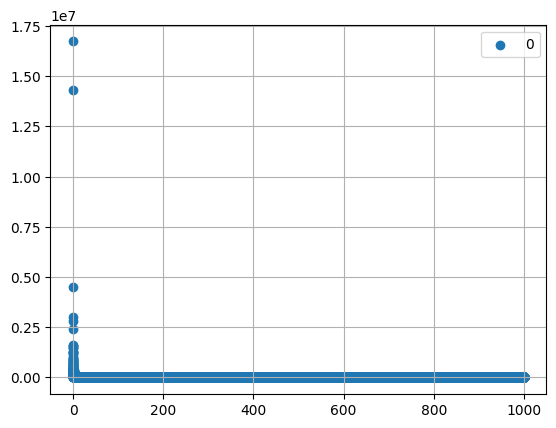

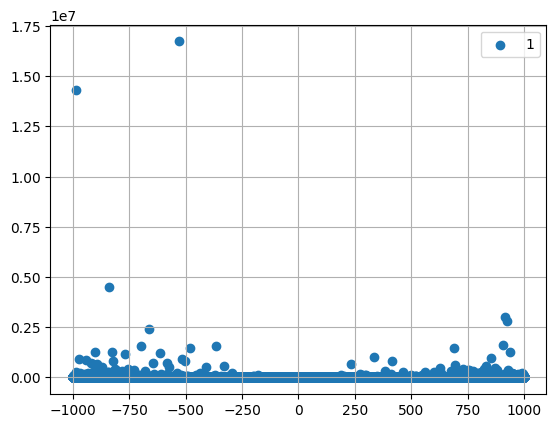

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for i in  range(2):


    fig, ax = plt.subplots()

    ax.scatter(X[:,i], y, label=i)
    # ax.scatter(test_scaled[:,4], y_test, label='ans')
    # plt.scatter(x, y, s=area2, marker='o', c=c)

    ax.legend()
    ax.grid(True)

    plt.show()

In [ ]:
(X[0][0]-np.mean(np.array(X[:,0])))/np.std(np.array(X[:,0]))

tensor(-0.5696)

In [ ]:
(X[0][1]-np.mean(np.array(X[:,1])))/np.std(np.array(X[:,1]))

tensor(0.4004)

In [ ]:
(y[0]-np.mean(np.array(y)))/np.std(np.array(y))

tensor(-0.0257)

In [ ]:
0.4004**2/(2*-0.5696)

-0.14073047752808987

In [ ]:
X[:,0]

tensor([333.8678,  64.6287, 757.8832,  ..., 941.4576,  36.2683, 381.7072])

In [ ]:
np.mean(np.array(X[:,0]))

498.30087

In [ ]:
# preprocess
# loss가 두배이상이다.


# Standardizing data
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Define the model
model = nn.Sequential(
    nn.Linear(2, 6),
    nn.ReLU(),
    nn.Linear(6, 3),
    nn.ReLU(),
    nn.Linear(3, 2),
    nn.ReLU(),
    nn.Linear(2, 1)
)

# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

n_epochs = 20   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

    print(epoch, 'loss:', mse)

# restore model and return best accuracy
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

model.eval()
with torch.no_grad():
    # Test out inference with 5 samples
    for i in range(5):
        X_sample = X_test_raw[i: i+1]
        X_sample = scaler.transform(X_sample)
        X_sample = torch.tensor(X_sample, dtype=torch.float32)
        y_pred = model(X_sample)
        print(f"{X_test_raw[i]} -> {y_pred[0].numpy()} (expected {y_test[i].numpy()})")

<ipython-input-22-dadd3cf96531>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
<ipython-input-22-dadd3cf96531>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)


0 loss: 747052352.0
1 loss: 747052288.0


KeyboardInterrupt: ignored

<ipython-input-35-573cf2c9f3cc>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-35-573cf2c9f3cc>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
<ipython-input-35-573cf2c9f3cc>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-35-573cf2c9f3cc>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().de

0 loss: 2899294.0
1 loss: 1710533.75
2 loss: 885244.375
3 loss: 424270.15625
4 loss: 128855.125
5 loss: 6991.4365234375
6 loss: 971.200439453125
7 loss: 1516.9393310546875
8 loss: 981.8504028320312
9 loss: 628.3618774414062
10 loss: 406.86322021484375
11 loss: 271.0368347167969
12 loss: 179.40406799316406
13 loss: 113.95734405517578
14 loss: 62.12815475463867
15 loss: 22.958980560302734
16 loss: 4.083049774169922
17 loss: 146.38258361816406
18 loss: 147.15904235839844
19 loss: 157.56588745117188
20 loss: 151.0840606689453
21 loss: 127.92552185058594
22 loss: 6.025202751159668
23 loss: 43.78251266479492
24 loss: 49.5714111328125
25 loss: 34.29206085205078
26 loss: 24.22484588623047
27 loss: 39.63362503051758
28 loss: 32.57929611206055
29 loss: 27.829404830932617
30 loss: 36.25054931640625
31 loss: 42.89894104003906
32 loss: 33.3344841003418
33 loss: 16.913347244262695
34 loss: 32.14173126220703
35 loss: 21.358694076538086
36 loss: 31.57091522216797
37 loss: 39.25861358642578
38 loss: 41

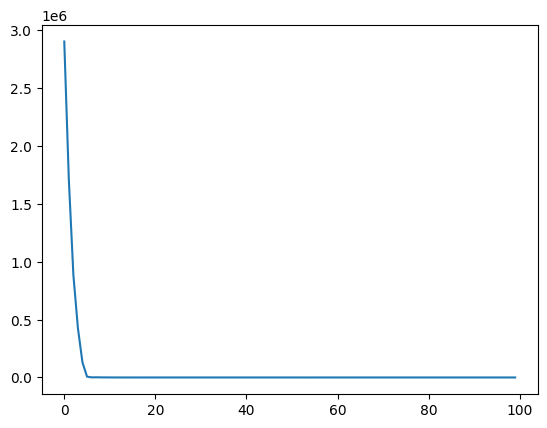

In [ ]:
#default
# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
# Define the model
model = nn.Sequential(
    nn.Linear(2, 6),
    nn.ReLU(),
    nn.Linear(6, 3),
    nn.ReLU(),
    nn.Linear(3, 2),
    nn.ReLU(),
    nn.Linear(2, 1)
    # nn.Linear(8, 24),
    # nn.ReLU(),
    # nn.Linear(24, 12),
    # nn.ReLU(),
    # nn.Linear(12, 6),
    # nn.ReLU(),
    # nn.Linear(6, 1)
)

# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

n_epochs = 100   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred/y_batch, torch.ones(len(y_pred)))
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred/y_test,  torch.ones(len(y_pred)))
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
    print(epoch, 'loss:', mse)

# restore model and return best accuracy
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

In [ ]:
y_pred

tensor([[ 0.0233],
        [-0.0008],
        [-0.0009],
        ...,
        [-0.0010],
        [-0.0009],
        [ 0.0031]], grad_fn=<AddmmBackward0>)

In [ ]:
y_test

tensor([[307.3839],
        [ 41.0861],
        [ 68.5963],
        ...,
        [  2.9429],
        [ 93.2451],
        [884.1298]])

In [ ]:
np.ones(len(y_pred))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
y_batch

tensor([[ 280.7855],
        [   3.4204],
        [ 148.4395],
        [ 130.9875],
        [  78.8547],
        [ 169.4272],
        [1137.6927],
        [ 254.8196],
        [  65.8677],
        [1888.5782]])

<ipython-input-40-be19df447bf5>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-40-be19df447bf5>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
<ipython-input-40-be19df447bf5>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-40-be19df447bf5>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().de

0 loss: 1097790336.0
1 loss: 364976320.0
2 loss: 989655232.0
3 loss: 16291910656.0
4 loss: 1156131712.0
5 loss: 699634624.0
6 loss: 1097716352.0
7 loss: 325107712.0
8 loss: 508295040.0
9 loss: 388932192.0
10 loss: 443881088.0
11 loss: 425377376.0
12 loss: 428542528.0
13 loss: 429111456.0
14 loss: 428125728.0
15 loss: 426652096.0
16 loss: 426254496.0
17 loss: 424816192.0
18 loss: 423936448.0
19 loss: 423070048.0
20 loss: 421708032.0
21 loss: 421392288.0
22 loss: 420596832.0
23 loss: 419304576.0
24 loss: 419053344.0
25 loss: 417228896.0
26 loss: 417564256.0
27 loss: 415765952.0
28 loss: 416279648.0
29 loss: 415712416.0
30 loss: 415712352.0
31 loss: 415730272.0
32 loss: 415204032.0
33 loss: 415217888.0
34 loss: 415777472.0
35 loss: 415217888.0
36 loss: 415723808.0
37 loss: 415215456.0
38 loss: 415777536.0
39 loss: 415723872.0
40 loss: 415723872.0
41 loss: 415215552.0
42 loss: 415217920.0
43 loss: 416739936.0
44 loss: 416739648.0
45 loss: 415179904.0
46 loss: 416193824.0
47 loss: 415179904

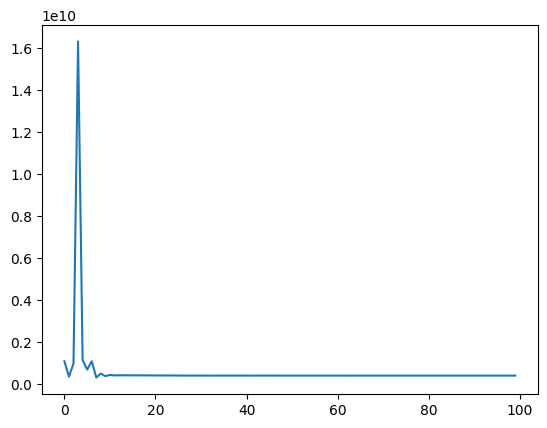

In [40]:
#default
# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
# Define the model
model = nn.Sequential(
    nn.Linear(2, 6),
    nn.ReLU(),
    nn.Linear(6, 3),
    nn.ReLU(),
    nn.Linear(3, 2),
    nn.ReLU(),
    nn.Linear(2, 1)
    # nn.Linear(8, 24),
    # nn.ReLU(),
    # nn.Linear(24, 12),
    # nn.ReLU(),
    # nn.Linear(12, 6),
    # nn.ReLU(),
    # nn.Linear(6, 1)
)

# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

n_epochs = 100   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred/y_batch + y_batch/y_pred, torch.ones(len(y_pred))*2 )
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred/y_test + y_test/y_pred,  torch.ones(len(y_pred))*2)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
    print(epoch, 'loss:', mse)

# restore model and return best accuracy
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

for i in range(5,6):
# for i in range(5,6):

    model = torch.nn.Sequential(
        nn.Linear(2, 6),
        nn.ReLU(),
        nn.Linear(6, 3),
        nn.ReLU(),
        nn.Linear(3, 2),
        nn.ReLU(),
        nn.Linear(2, 1)
    )

    # model.to(device)

    # 6.17

    # nn package 에서 제공하는 MSE loss 함수
    loss_fn = torch.nn.MSELoss()
    print(i)
    learning_rate = 10**(-i)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for t in range(1,10+1):


        y_pred = model(X_train)

        loss = loss_fn( y_pred/y_train + y_train/y_pred,  torch.ones(len(y_pred))*2 )

        # if t % 100 == 0:
        #     print(t, 'loss:', loss.item())
        #     print('y_pred[0]:', y_pred[0][:10].cpu().detach().numpy().round(3))
        #     print('y[0]:', y[0][:10])

        #     for param in model.parameters():
        #         print(param[0])

        #     print("")
        model.zero_grad()

        loss.backward()

        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad
        # if t == 1 or t == 2:
        if t %10 == 0 :#or t == 1 or t == 2 or t < 10:
            print(t, 'loss:', loss.item(), np.log10(loss.item()),'----------------------------------------------------')
            print('y_pred[0]:', y_pred[0][:10].cpu().detach().numpy().round(3))
            print('y[0]:', y_train[:10])

            for param in model.parameters():
                print('param')
                print(param[0])
                print('grad')
                print(param.grad[0])

            print("")

<ipython-input-44-126d6cac673d>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-44-126d6cac673d>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
<ipython-input-44-126d6cac673d>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-44-126d6cac673d>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().de

5
